# Binning (Discretization)

* Binning is the process of transforming continuous variables into discrete variables by creating a set of contigous intervals that span the range of the variable values.
* It is also called as "Discretization". Also bin is an alterante name for Interval.

There are three types of Binning Techniques : 
1. Supervised Binning - In this process binning uses target variable to make bins.
    * Decision Tree Binning
2. Unsupervised Binning - In this the process only focuses on the specific column or data.
    * Uniform Binning or Equal Width Binning
    * Quantile Binning or Equal Frequnecy Binning
    * Kmeans Binning
3. Custom Binning - We can create our binning techniques.

**Note : *This notebook only focuses on popular binning techniques those are unsupervises techniques.***

## Loading  Dataset to implement

In [2]:
# Importing Librares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset
df = pd.read_csv('student_exam_scores.csv')

In [4]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


## 1. Uniform Binning or Equal width Binning

* In this it divides the values into equal intervals or bins.
* The number of data points in the every bin is not equal.
* It stores the respected data points to the respected bin.
* Example :

        data = [1,10,20,41,32,45,72,100,23,45,62,78,11]
        let bins = 10
        formula :  length of each bin = (max - min)/number of bins
| Bins | 1 - 10 | 11 - 20 | 21 - 30 | 31 - 40 | 41 - 50 | 51 - 60 | 61 - 70 | 71 - 80 | 81 - 90 | 91 - 100 |
|------|--------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| No.of values | 2 | 2 | 1 | 1 | 3 | 0 | 1 | 2 | 0 |  1 |
   

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
uniformBinning = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'uniform')

In [7]:
exam_score_uniform_binned = uniformBinning.fit_transform(df[['previous_scores']])

In [8]:
uniformBinning.bin_edges_[0]

array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ])

<Axes: xlabel='previous_scores', ylabel='Count'>

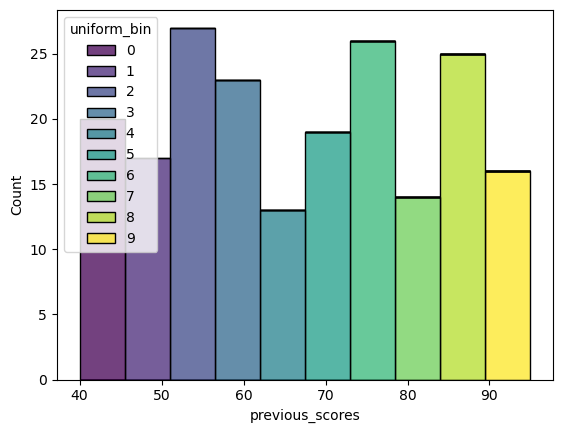

In [9]:
df["uniform_bin"] = exam_score_uniform_binned.astype(int)

sns.histplot(data=df, x="previous_scores", hue="uniform_bin", bins=10, palette="viridis", multiple="stack")


## 2. Quantile Binning or Frequency Binning

* Quantile Binning ensures that every bin has roughly equal number of values.
* Here, bins or interval ranges are not equal.
* If 10 ages and 4 bins -> every bin contains roughly 3 to 2 values.

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

In [11]:
quantileBinning = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'quantile')

In [12]:
exam_score_quantile_binned = quantileBinning.fit_transform(df[['previous_scores']])

In [13]:
quantileBinning.bin_edges_[0]

array([40. , 45.9, 51. , 55.7, 59. , 67.5, 73. , 77.3, 84. , 88. , 95. ])

<Axes: xlabel='previous_scores', ylabel='Count'>

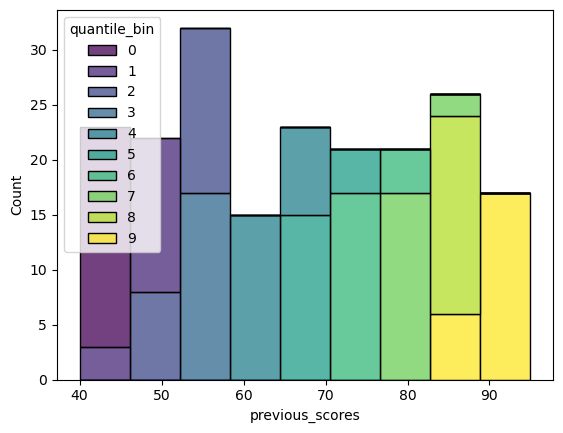

In [14]:
df["quantile_bin"] = exam_score_quantile_binned.astype(int)

sns.histplot(data=df, x="previous_scores", hue="quantile_bin", palette="viridis", multiple="stack")


## 3. k-means Binning

* uses Clustering to make bins.
* Groups similar values together.

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

In [16]:
kmeansBinning = KBinsDiscretizer(n_bins = 3,encode = 'ordinal',strategy = 'kmeans')

In [17]:
exam_score_kmeans_binned = kmeansBinning.fit_transform(df[['previous_scores']])

C:\Users\NARESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
kmeansBinning.bin_edges_[0]

array([40.        , 61.29885057, 78.89341693, 95.        ])

<Axes: xlabel='previous_scores', ylabel='Count'>

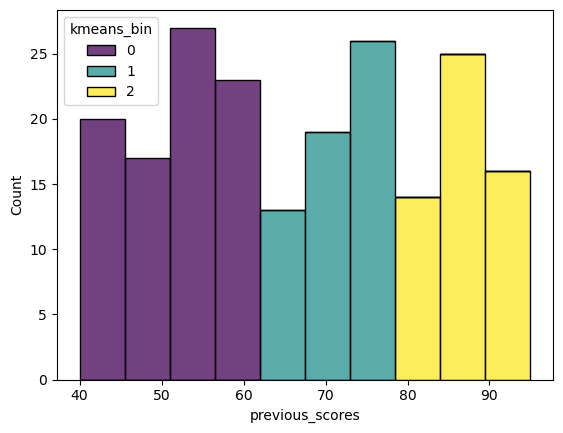

In [19]:
df["kmeans_bin"] = exam_score_kmeans_binned.astype(int)

sns.histplot(data=df, x="previous_scores", hue="kmeans_bin", bins=10, palette="viridis", multiple="stack")


# Binarization

* Binarization is the process of converting continous values into binary values [0,1].
* Here "threshold" plays a vital role.
* Example :  data = [1,10,20,35,40]

            let,threshold = 30
            if threshold<30 --> 0 and if threshold>=30 --> 1
            data_binarized= [0,0,0,1,1]

In [22]:
df_new = pd.DataFrame(df['exam_score'], columns = ['exam_score'])

In [23]:
df_new.head()

,exam_score
0,30.2
1,25.0
2,35.8
3,34.0
4,40.3


In [27]:
from sklearn.preprocessing import Binarizer

In [43]:
binarizer = Binarizer(threshold = 25)

In [44]:
df_new['exam_score_discretized'] = binarizer.fit_transform(df_new[['exam_score']])

In [48]:
df_new.sample(10)

,exam_score,exam_score_discretized
168,32.1,1.0
51,30.7,1.0
143,35.1,1.0
7,18.3,0.0
151,42.3,1.0
165,30.1,1.0
28,37.2,1.0
69,23.9,0.0
172,31.0,1.0
38,39.8,1.0
